In [43]:
from sklearn.datasets import _samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

In [44]:
# Generate data
X, y = _samples_generator.make_classification(n_samples=150,
                                            n_features=25, n_classes=3, n_informative=6,
                                            n_redundant=0, random_state=7)

In [45]:
# Select top K features
k_best_selector = SelectKBest(f_regression, k=9)

# Initialize extremely Random Forest Classifier
classifier = ExtraTreesClassifier(n_estimators=60, max_depth=4)

# Contruct the pipeline
processor_pipeline = Pipeline([('selector', k_best_selector), ('erf', classifier)])

# Set the parameters
processor_pipeline.set_params(selector__k=7, erf__n_estimators=30)

# Training the pipeline 
processor_pipeline.fit(X, y)

# Predict outputs for the input data
output = processor_pipeline.predict(X)
print("\nPredicted output:\n", output)

# Print scores 
print("\nScore:", processor_pipeline.score(X, y))

# Print the features chosen by the pipeline selector
status = processor_pipeline.named_steps['selector'].get_support()

# Extract and print indices of selected features
selected = [i for i, x in enumerate(status) if x]
print("\nIndices of selected features:", ', '.join([str(x) for x in selected]))


Predicted output:
 [1 2 2 0 2 0 2 1 0 1 1 2 0 0 2 2 1 0 0 0 0 2 0 1 2 2 0 0 1 2 1 2 1 0 2 2 1
 1 2 2 2 1 1 0 2 1 1 2 1 0 1 2 2 2 2 0 2 2 0 2 2 0 1 0 2 2 1 1 1 2 0 1 0 2
 0 0 1 2 2 0 0 1 2 2 0 0 0 0 2 2 2 1 2 0 2 0 2 2 0 0 1 1 1 1 2 2 0 2 0 1 1
 0 2 1 0 0 1 1 1 1 0 0 0 1 2 0 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 2 0
 2 2]

Score: 0.88

Indices of selected features: 4, 7, 8, 12, 14, 17, 22


In [46]:
import numpy as np
import matplotlib. pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [47]:
# Input data
X = np.array([[2.1, 1.3],[1.3, 3.2], [2.9, 2.5],[2.7, 5.4], [3.8, 0.9],
            [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
            [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])

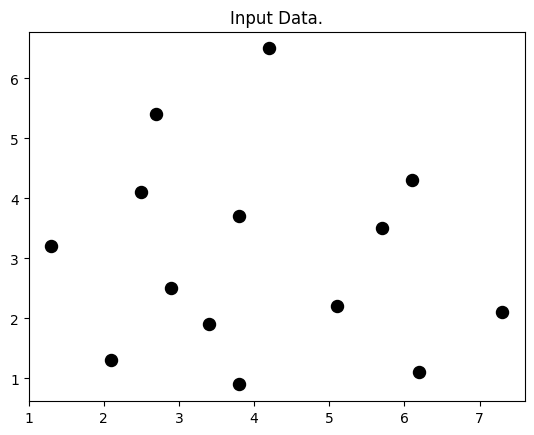

In [48]:
# Number of K nearest.
k = 5

# Test data points.
test_datapoint = [4.3, 2.7]

# Plot input data.
plt.figure()
plt.title("Input Data.")
plt.scatter(X[:,0], X[:,1], marker="o", s=75, color="black")

In [49]:
# Build K nearest neighbors model.
knn_model = NearestNeighbors(n_neighbors=k, algorithm="ball_tree").fit(X)
distances, indices = knn_model.kneighbors([test_datapoint])

# Print the k nearest neighbors.
print("\nK Nearest Neighbors: ")
for rank, index in enumerate(indices[0] [:k], start=1):
    print(str(rank) + "==>", X[index])


K Nearest Neighbors: 
1==> [5.1 2.2]
2==> [3.8 3.7]
3==> [3.4 1.9]
4==> [2.9 2.5]
5==> [5.7 3.5]


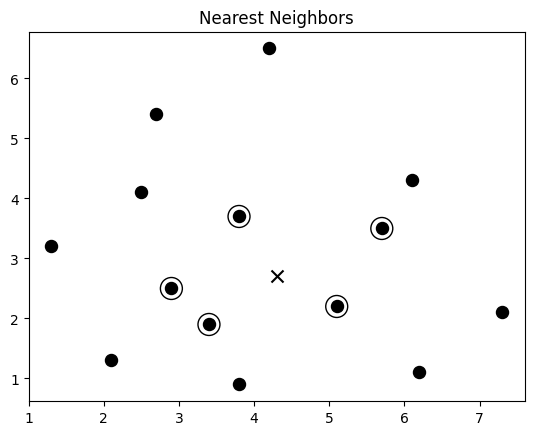

In [50]:
# Visual of the k nearest neighbor plot.
plt.figure()
plt.title("Nearest Neighbors")
plt.scatter(X[:, 0], X[:, 1], marker="o", s=75, color="k")
plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1], marker="o", s=250, color="k", facecolors="none")
plt.scatter(test_datapoint[0], test_datapoint[1], marker="x", s=75, color="k")
plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

In [52]:
# Load input data
input_file = 'data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(int)

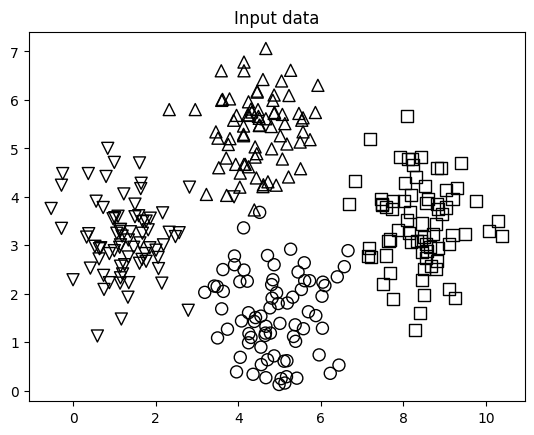

In [53]:
# Plot input data
plt.figure()
plt.title('Input data')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

In [54]:
# Number of nearest neighbors 
num_neighbors = 12

# Step size of the visualization grid
step_size = 0.01  

# Create a K Nearest Neighbors classifier model 
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')

# Train the K Nearest Neighbors model
classifier.fit(X, y)

# Create the mesh to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

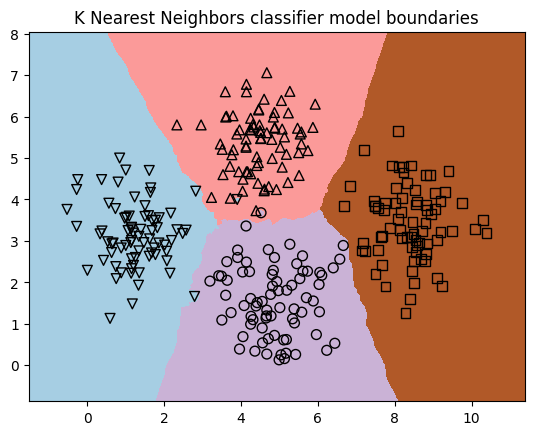

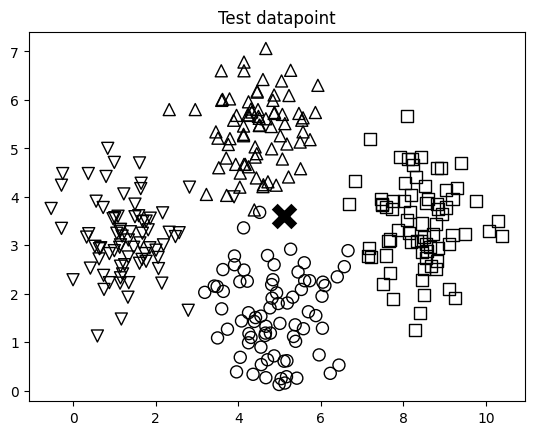

In [55]:
# Evaluate the classifier on all the points on the grid 
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Visualize the predicted output 
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)

# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('K Nearest Neighbors classifier model boundaries')

# Test input datapoint
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

# Extract the K nearest neighbors
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(int)[0]

Text(0.5, 1.0, 'K Nearest Neighbors')

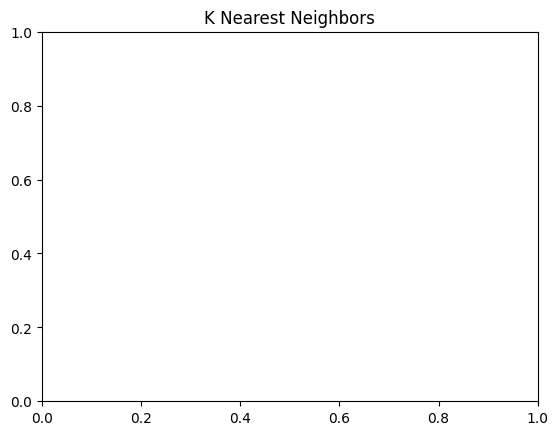

In [56]:
# Plot k nearest neighbors
plt.figure()
plt.title('K Nearest Neighbors')

Predicted output: 1


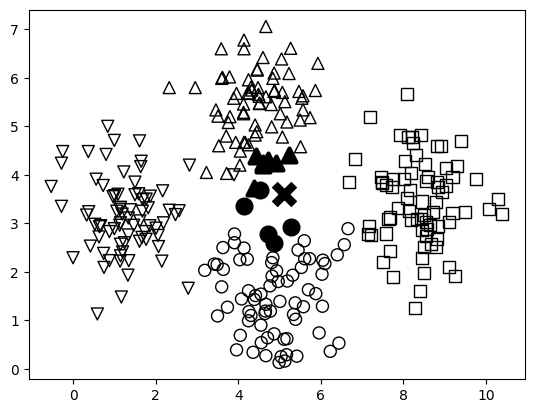

In [57]:
for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]], 
            linewidth=3, s=100, facecolors='black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

print("Predicted output:", classifier.predict([test_datapoint])[0])

plt.show()


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Dataset URL
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names=headernames)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Find optimal k using cross-validation
k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))

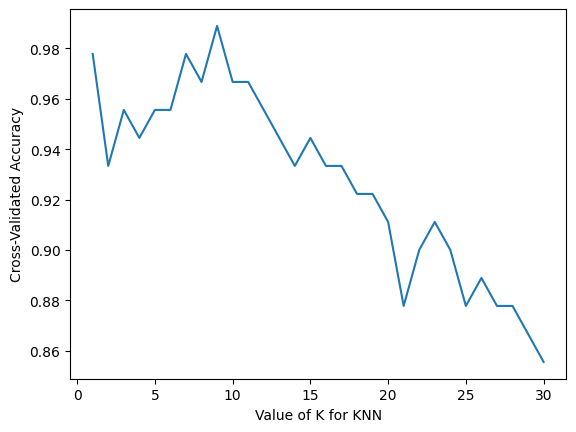

Optiomal value of k: 9
Confusion Matrix:
[[20  0  0]
 [ 0 19  3]
 [ 0  2 16]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.90      0.86      0.88        22
 Iris-virginica       0.84      0.89      0.86        18

       accuracy                           0.92        60
      macro avg       0.92      0.92      0.92        60
   weighted avg       0.92      0.92      0.92        60

Accuracy: 0.9166666666666666


In [59]:
# Plot the cross-validation scores
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Train the classifier using the optimal value of k
optimal_k = np.argmax(scores) + 1
print("Optiomal value of k:", optimal_k)
classifier = KNeighborsClassifier(n_neighbors=optimal_k)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)